## Quantitiative Daten
Quantitative Daten sind Messwerte die in numerischer Form dargestellt werden.

Zur Visualisierung von quantitativen Daten werden meist Histogramme, Boxplots und Streudiagramme verwendet.

Zur Darstellung in Python kann die `seaborn` Plotting Library verwendet werden. Die nächsten Beispiele werden mit dieser Library und dem Datensatz Titanic (`titanic.csv`) realisiert.

In [296]:
# HIDDEN
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def df_interact(df):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + 5, col:col + 8]
    interact(peek, row=(0, len(df), 5), col=(0, len(df.columns) - 6))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))
    
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set()

In [297]:
# Load the dataset in Python and drop N/A values to make plot function calls simpler
ti = sns.load_dataset('titanic').dropna().reset_index(drop=True)

# This table is too large to fit onto a page so we'll output sliders to
# pan through different sections.
# df_interact(ti)

In [298]:
# HIDDEN
# Enable R in Python notebook
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [299]:
%%R
# Init libraries
install.packages("lmtest")
install.packages("vcd", repos="http://R-Forge.R-project.org")
install.packages("ggplot2")
library(vcd)
library(ggplot2)

In [300]:
%%R
# Load the dataset in R and drop N/A values to make plot function calls simpler
ti <- read.csv("titanic.csv", header = TRUE, sep=",")
# Delete rows with empty values
# For some reasons the r dataset contains three additional rows
# Source: https://stackoverflow.com/questions/9126840/delete-rows-with-blank-values-in-one-particular-column
ti <- ti[!(is.na(ti$PassengerId) | is.na(ti$Survived) | is.na(ti$Pclass) | ti$Name=="" |
           ti$Sex=="" | is.na(ti$Age) | is.na(ti$SibSp) | is.na(ti$Parch) | ti$Ticket=="" |
           is.na(ti$Fare) | is.na(ti$Cabin) | ti$Cabin=="" | ti$Embarked==""), ] 
# Generate a "Who" column for sorting man/woman/children
# Source: https://rstudio-pubs-static.s3.amazonaws.com/143316_106d643df86c4e4c8ae20e9775ab0ec7.html
ti$Who[ti$Sex=="male"] <- "man"
ti$Who[ti$Sex=="female"] <- "woman"
ti$Who[ti$Age<18] <- "child"

### Histogramme
Histogramme eignen sich gut um Verläufe von Häufigkeitsverteilungen zu visualisieren. Der Datensatz der Titanic enthält für jeden Passagier eine Zeile mit Informationen, darunter auch das Alter. Somit kann man eine Verteilung des Alters der Passagiere erstellen.

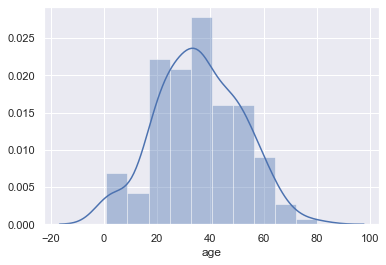

In [301]:
# Adding a semi-colon at the end tells Jupyter not to output the
# usual <matplotlib.axes._subplots.AxesSubplot> line
sns.distplot(ti['age']);

In [302]:
%%R
# Following function is needed to force break intervals in histogramms in R
# Source: https://stackoverflow.com/questions/49438936/understanding-hist-and-break-intervals-in-r
breakInterval <- function(data, interval) {
    seq(min(data), max(data), length.out = interval+1)
}

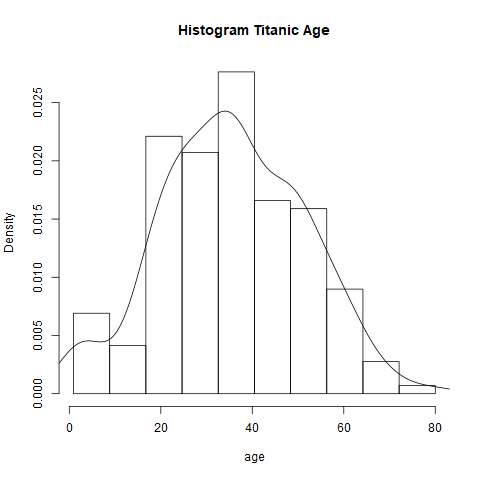

In [303]:
%%R
hist(ti$Age, freq=FALSE, breaks=breakInterval(ti$Age, 10), xlab="age", main="Histogram Titanic Age")
# Draw KDE (gaussian kernel densitiy estimate) over histogram
# Source: https://stackoverflow.com/questions/20952730/how-to-draw-kde-over-histogram-plot
dens <- density(ti$Age)
lines(dens)

Die Python Funktion `distplot` fügt automatisch eine geglättete Kurve, die KDE (Kernel Density Estimation) bzw. in Deutsch die Kerndichteschätzung, welche eine Wahrscheinlichkeitsdichtefunktion darstellt die zur Erstellung der Wahrscheinlichkeitsverteilung dient.

In R wird diese Kurve nicht automatisch erstellt, man kann aber nach dem Plotten des Histogramms mit der Funktion `density` ein KDE erzugen und mithilfe von `lines` dem vorher erzeugten Grafik-Object die Kurve hinzufügen. Das Aufrufen von Funktionen nach dem Plotten zur weiteren Bearbeitung der Ausgabe ist ein oft verwendetes Konzept in R.

Weiters kann ein sogennanter "Rug" erstellt werden, damit sind Markierungen aller individuellen Werte auf der x-Achse gemeint. In Python ist es eine Parameterzugabe, in R wieder ein Funktionsaufruf.

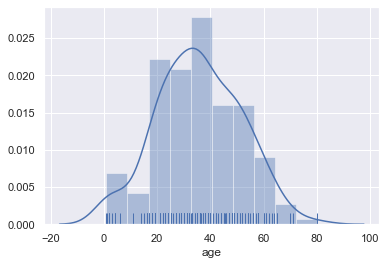

In [304]:
sns.distplot(ti['age'], rug=True);

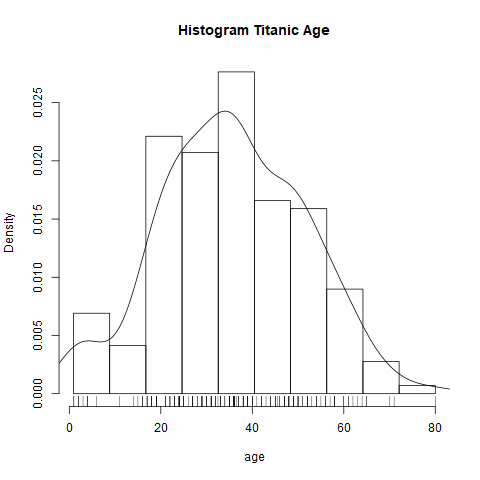

In [305]:
%%R
hist(ti$Age, freq=FALSE, breaks=breakInterval(ti$Age, 10), xlab="age", main="Histogram Titanic Age")
# Draw KDE (gaussian kernel densitiy estimate) over histogram
# Source: https://stackoverflow.com/questions/20952730/how-to-draw-kde-over-histogram-plot
dens <- density(ti$Age)
lines(dens)
rug(ti$Age)

Weiters kann die Anzahl der "Rechtecke" des Histogramms verändert werden. Eine Erhöhung dieser führt zu einer feinerern Erkennung der Altersgruppen.

Für R habe eine Funktion `breakInterval` geschrieben, der den Plot die Anzahl der "Rechtecke" vorschreibt. Nur die gewünschte Anzahl anzugeben führt oft nicht zum gewünschten Ergebniss, da R nicht garantiert, diese einzuhalten.

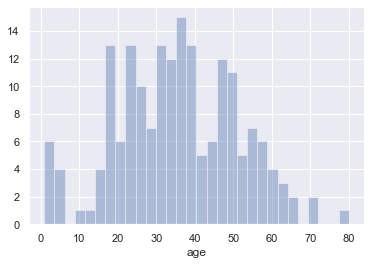

In [306]:
sns.distplot(ti['age'], kde=False, bins=30);

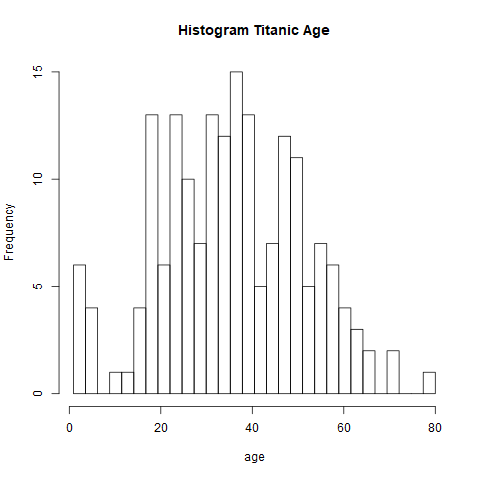

In [307]:
%%R
hist(ti$Age, breaks=breakInterval(ti$Age, 30), xlab="age", main="Histogram Titanic Age")

### Box-Plots
Box-Plots weeden hautpsächlich verwendet, um sich einen Überblick von darliegenden Daten zu verschaffen.

Ein Box-Plot besteht aus einer Box und einer Antenne bzw. Whisker je links und rechts. Der Anfang der Box stellt das untere Quartil dar, das Ende das obere Quartil. Der Strich in der Mitte bildet den Median ab. 

Je nach Implementierungen füllen die Whishers die komplette Spannweite (gesamter Wertebereich) oder haben eine Längenbegrenzung z.B. das 1,5-Fache des Inerquartilsabstands (Länge der Box). Dann werden alle Werte ausserhalb der Whiskers als Ausreißer interpretiert.

Die Darstellung der Fahrpreis des Titanic Datensatz mittels Python und R geschieht sehr ähnlich. Bei R muss man einzig angeben, das man den Plot horizontal anlegen möchte.

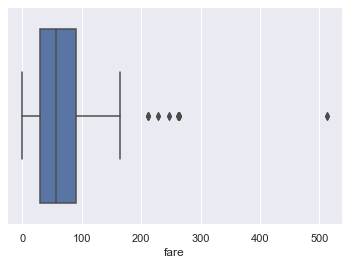

In [308]:
sns.boxplot(x='fare', data=ti);

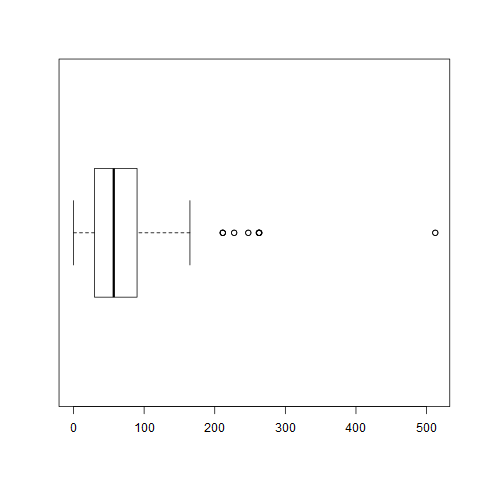

In [309]:
%%R
boxplot(ti$Fare, horizontal=TRUE)

Diese Darstellungen geben einen Überblick über die Fahrpreise, doch es ist meist sinnvoller bei Box-Plots die Daten in Kategorien einzuteilen und diese zu vergleichen.

Die Boxplot Funktion in Python ist intelligent genug, die Kategorien selbst herauszusuchen. In R muss man die Kategorien getrennt angebeben, doch in Gegensatz zu anderen R Funktionen kann man mehrere Daten auf einmal in eine Funktion übergeben, anstatt drei Boxplots zu bilden.

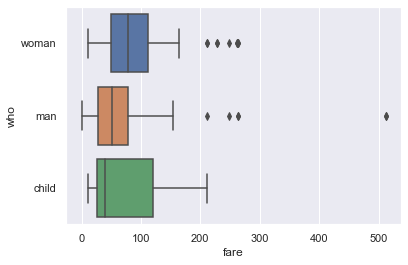

In [310]:
sns.boxplot(x='fare', y='who', data=ti);

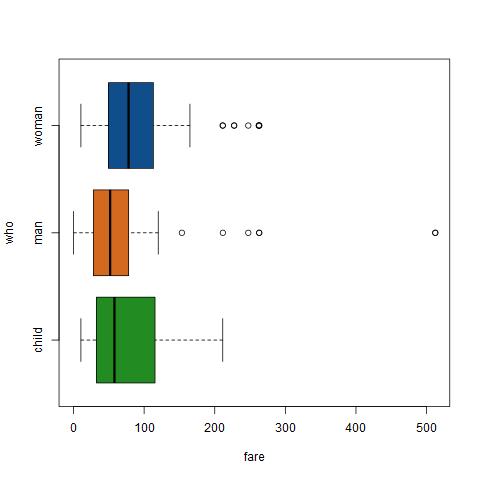

In [311]:
%%R
# Source: https://www.datamentor.io/r-programming/box-plot/
# Colors: http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf
boxplot(ti$Fare[ti$Who=="child"],  ti$Fare[ti$Who=="man"], ti$Fare[ti$Who=="woman"], horizontal=TRUE,
    xlab = "fare", ylab = "who",
    names = c("child", "man", "woman"),
    col = c("forestgreen", "chocolate", "dodgerblue4")
)

Die invidiuelle Anzeiger aller Kategorien auf einem Plot hilft bei der Übersichtlichkeit und Interpretation der Daten. Bei Histogrammen führt es eher zum Gegenteil, einem viel zu überladenen und nicht durchschaubaren Plot.

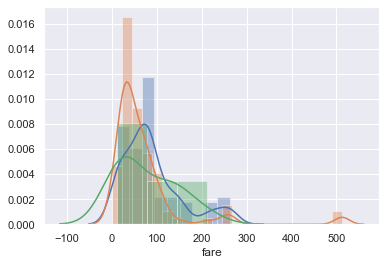

In [312]:
sns.distplot(ti.loc[ti['who'] == 'woman', 'fare'])
sns.distplot(ti.loc[ti['who'] == 'man', 'fare'])
sns.distplot(ti.loc[ti['who'] == 'child', 'fare']);

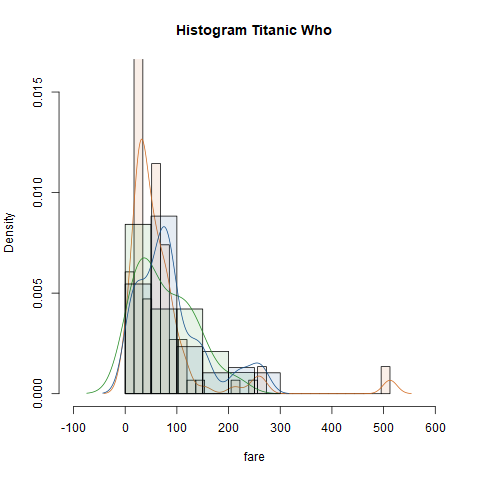

In [313]:
%%R
# Multiple figures in one plot: https://stackoverflow.com/a/9976492
# Transparent color: https://stackoverflow.com/a/30940291
hist(ti$Fare[ti$Who=="man"], freq=FALSE, breaks=breakInterval(ti$Fare[ti$Who=="man"], 30),
    xlab="fare", main="Histogram Titanic Who",
    col = c(adjustcolor( "chocolate", alpha.f = 0.1)),
    xlim=c(-100,600),
    ylim=c(0,0.016)
)
dens <- density(ti$Fare[ti$Who=="man"])
lines(dens, col = c("chocolate"))

hist(ti$Fare[ti$Who=="child"], freq=FALSE, main="Histogram Titanic Who",
     col = c(adjustcolor( "forestgreen", alpha.f = 0.1)), add=TRUE)
dens <- density(ti$Fare[ti$Who=="child"])
lines(dens, col = c("forestgreen"))

hist(ti$Fare[ti$Who=="woman"], freq=FALSE, main="Histogram Titanic Who",
     col = c(adjustcolor( "dodgerblue4", alpha.f = 0.1)), add=TRUE)
dens <- density(ti$Fare[ti$Who=="woman"])
lines(dens, col = c("dodgerblue4"))

## Streudiagramme (Scatter Plots)
Mit linearer Regression

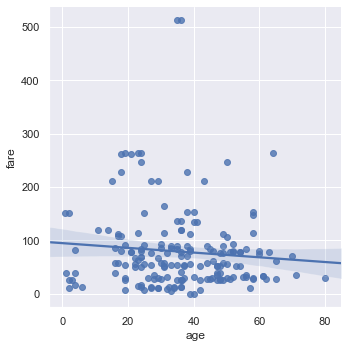

In [314]:
sns.lmplot(x='age', y='fare', data=ti);

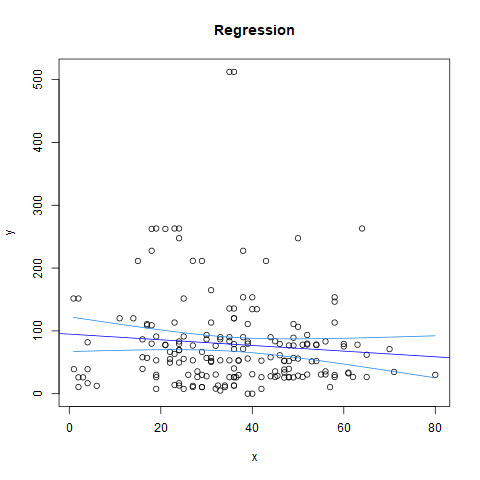

In [328]:
%%R
# Source: https://stackoverflow.com/a/46459957
# Note temporary variables are important because of "newdata=data.frame(x=newx)". 
# Using ti$Age their results in error.
x<-ti$Age
y<-ti$Fare
# Linear regression
lm.out <- lm(y ~ x) 
# Confidence interval
newx = seq(min(x),max(x),by = 0.05)
conf_interval <- predict(lm.out, newdata=data.frame(x=newx), interval="confidence", level = 0.95)
plot(x, y, xlab="x", ylab="y", main="Regression")
abline(lm.out, col="blue")
matlines(newx, conf_interval[,2:3], col = "dodgerblue2", lty=1)

Da Umsetzung mit lin reg und Konfidenzintervalle schwierig, kann man ggplot verwenden

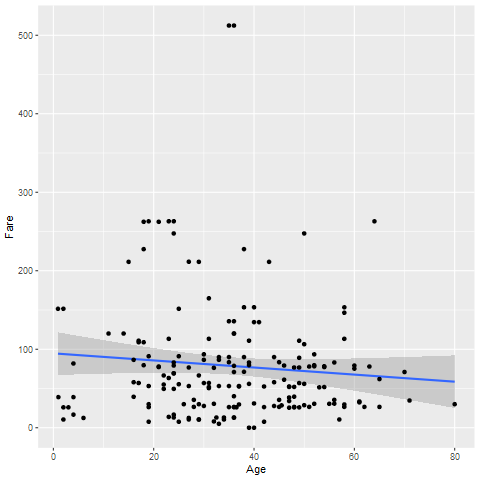

In [316]:
%%R
# Sources:
# https://stackoverflow.com/questions/15633714/adding-a-regression-line-on-a-ggplot
# http://www.sthda.com/english/wiki/ggplot2-scatter-plots-quick-start-guide-r-software-and-data-visualization
# http://www.sthda.com/english/wiki/ggplot2-scatter-plots-quick-start-guide-r-software-and-data-visualization
# plot + regression line with confidence interval + scatter points
ggplot(ti, aes(x=Age, y=Fare)) + geom_smooth(method="lm") + geom_point()